### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Cálculo de ventas totales por tienda
ventas_tienda1 = tienda['Precio'].sum()
ventas_tienda2 = tienda2['Precio'].sum()
ventas_tienda3 = tienda3['Precio'].sum()
ventas_tienda4 = tienda4['Precio'].sum()

In [4]:
# Se muestran las ventas totales por tienda
print(f'Las ventas totales de la tienda 1 son: ${ventas_tienda1:,.2f}')
print(f'Las ventas totales de la tienda 2 son: ${ventas_tienda2:,.2f}')
print(f'Las ventas totales de la tienda 3 son: ${ventas_tienda3:,.2f}')
print(f'Las ventas totales de la tienda 4 son: ${ventas_tienda4:,.2f}')

Las ventas totales de la tienda 1 son: $1,150,880,400.00
Las ventas totales de la tienda 2 son: $1,116,343,500.00
Las ventas totales de la tienda 3 son: $1,098,019,600.00
Las ventas totales de la tienda 4 son: $1,038,375,700.00


In [5]:
# Creación de un DataFrame llamado df_facturacion que muestra las ventas totales por tienda. Se dió formato a la forma de mostrar los valores de la columna Ventas para evitar notación científica
pd.set_option('display.float_format', '{:,.2f}'.format)
facturacion = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
               'Ventas':[tienda['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()]}

df_facturacion = pd.DataFrame(facturacion)
df_facturacion

,Tienda,Ventas
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


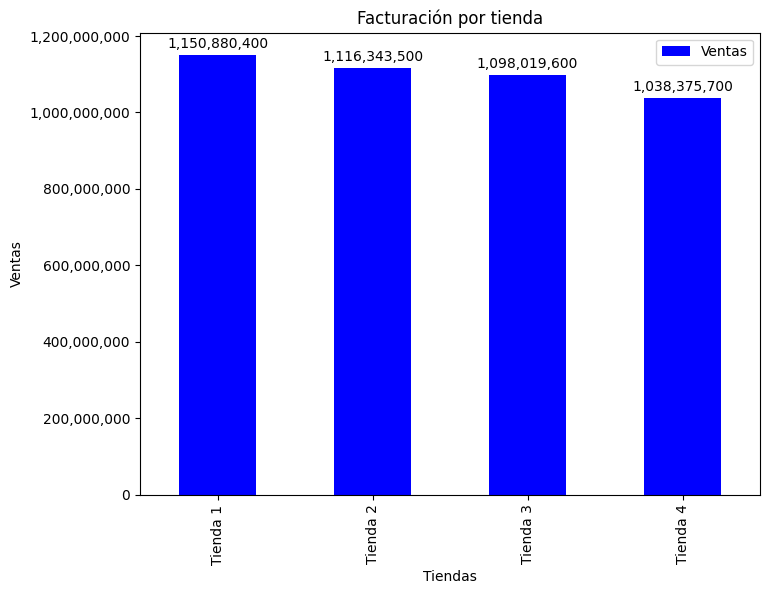

In [6]:
# Creación de la gráfica que ilustra el DataFrame df_facturacion creado en el paso anterior.
# Se dió formato a la gráfica para evitar la notación científica en el eje y y para que las barras muestren el valor de las ventas de cada tienda
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax = df_facturacion.plot(kind='bar', x='Tienda', y='Ventas', figsize=(8,6), color = 'blue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2.0, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center')

plt.title('Facturación por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas')
plt.gca().yaxis.set_major_formatter(formatter)

# 2. Ventas por categoría

In [7]:
# Se obtuvo el número de productos vendidos para cada categoría de la tienda 1
tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


,Producto
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


Text(0, 0.5, 'Ventas')

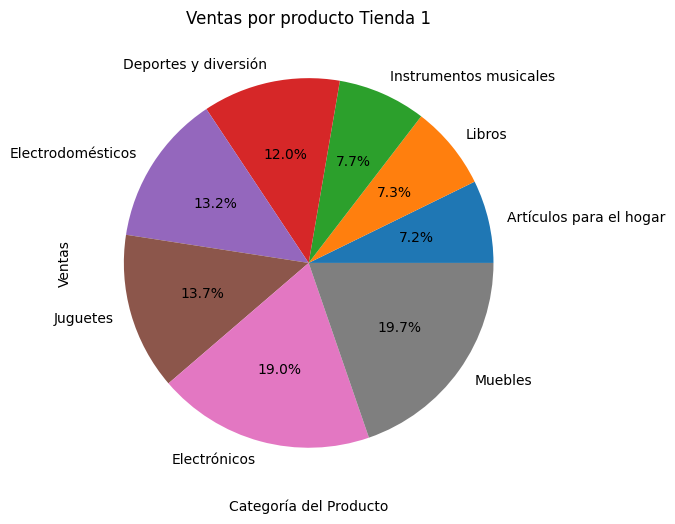

In [8]:
# Se generó una gráfica que ilustra el número de productos vendidos para cada categoría de la tienda 1
tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%')
plt.title('Ventas por producto Tienda 1')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')

In [9]:
# Se obtuvo el número de productos vendidos para cada categoría de la tienda 2
tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


,Producto
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


Text(0, 0.5, 'Ventas')

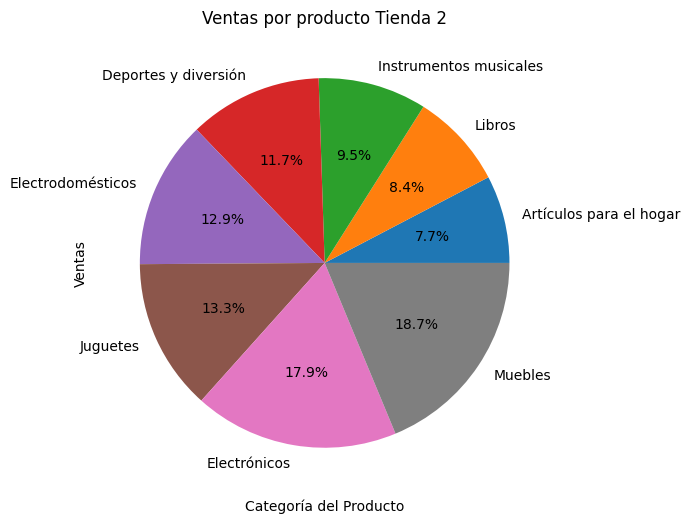

In [10]:
# Se generó una gráfica que ilustra el número de productos vendidos para cada categoría de la tienda 2
tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%')
plt.title('Ventas por producto Tienda 2')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')

In [11]:
# Se obtuvo el número de productos vendidos para cada categoría de la tienda 3
tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)


,Producto
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177


Text(0, 0.5, 'Ventas')

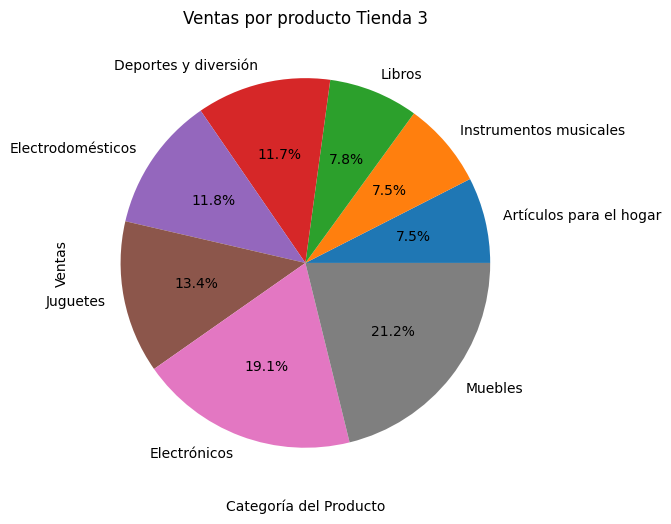

In [12]:
# Se generó una gráfica que ilustra el número de productos vendidos para cada categoría de la tienda 3
tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%')
plt.title('Ventas por producto Tienda 3')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')

In [13]:
# Se obtuvo el número de productos vendidos para cada categoría de la tienda 4
tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

,Producto
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


Text(0, 0.5, 'Ventas')

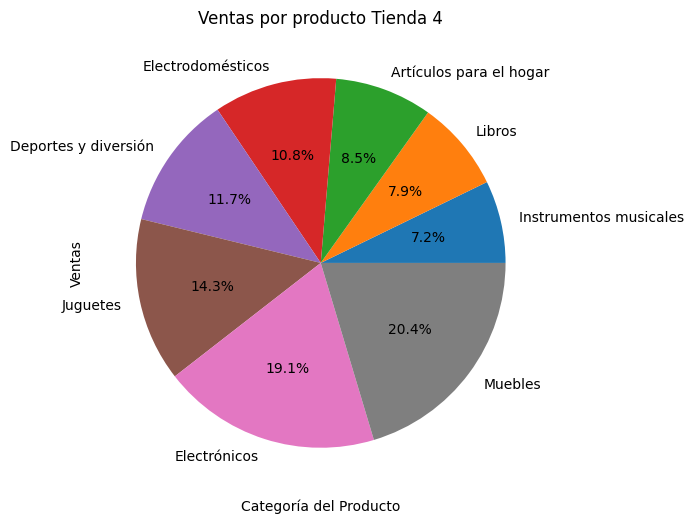

In [14]:
# Se generó una gráfica que ilustra el número de productos vendidos para cada categoría de la tienda 4
tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=True).plot(kind='pie', figsize=(8,6), autopct='%1.1f%%')
plt.title('Ventas por producto Tienda 4')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')

# 3. Calificación promedio de la tienda


In [15]:
# Se obtuvo el promedio de calificación otorgada por los clientes de cada tienda
calificacion_tienda1 = tienda['Calificación'].mean()
calificacion_tienda2 =tienda2['Calificación'].mean()
calificacion_tienda3 =tienda3['Calificación'].mean()
calificacion_tienda4 =tienda4['Calificación'].mean()

In [39]:
# Se muestran las calificaciones promedio de cada tienda
print(f'La calificación promedio de la tienda 1 es: {calificacion_tienda1:.2f}')
print(f'La calificación promedio de la tienda 2 es: {calificacion_tienda2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {calificacion_tienda3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {calificacion_tienda4:.2f}')

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


In [19]:
# Se generó el DataFrame df_evaluaciones que incluye las calificaciones promedio de los clientes por tienda
evaluaciones_cliente = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                        'Calificación promedio': [tienda['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean()]}
df_evaluaciones = pd.DataFrame(evaluaciones_cliente)
df_evaluaciones

,Tienda,Calificación promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


(3.5, 4.2)

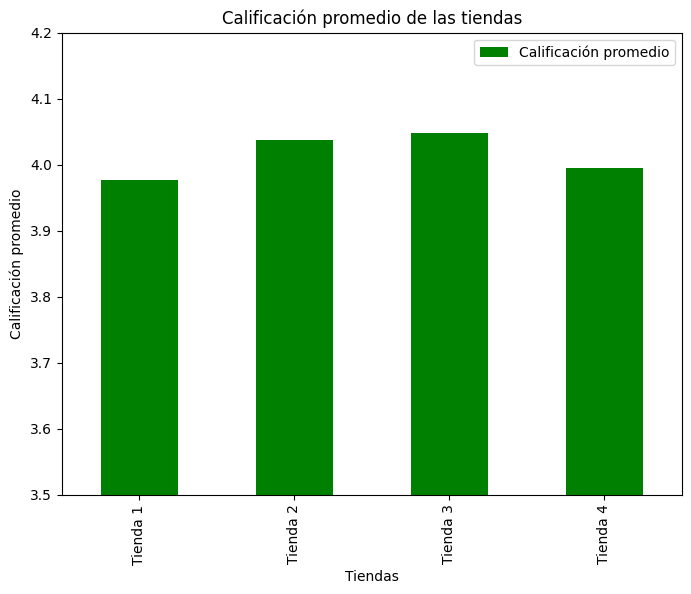

In [20]:
# Se generó la gráfica que ilustra el DataFrame df_evaluaciones creado en el paso anterior.
df_evaluaciones.plot(kind='bar', x='Tienda', y='Calificación promedio', figsize=(8,6), color = 'green')
plt.title('Calificación promedio de las tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Calificación promedio')
plt.ylim(3.5, 4.2)

# 4. Productos más y menos vendidos

In [21]:
# Se obtuvo el nombre del producto y número de productos más y menos vendidos en la tienda 1
producto_mas_vendido = tienda['Producto'].value_counts().idxmax()
unidades_max1 = tienda['Producto'].value_counts().max()
producto_menos_vendido = tienda['Producto'].value_counts().idxmin()
unidades_min1 = tienda['Producto'].value_counts().min()
print(f"El producto que más se vende en la tienda 1 es: {producto_mas_vendido} con {unidades_max1} unidades vendidas")
print(f"El producto que menos se vende en la tienda 1 es: {producto_menos_vendido} con {unidades_min1} unidades vendidas")

El producto que más se vende en la tienda 1 es: Microondas con 60 unidades vendidas
El producto que menos se vende en la tienda 1 es: Auriculares con micrófono con 33 unidades vendidas


Text(0, 0.5, 'Productos')

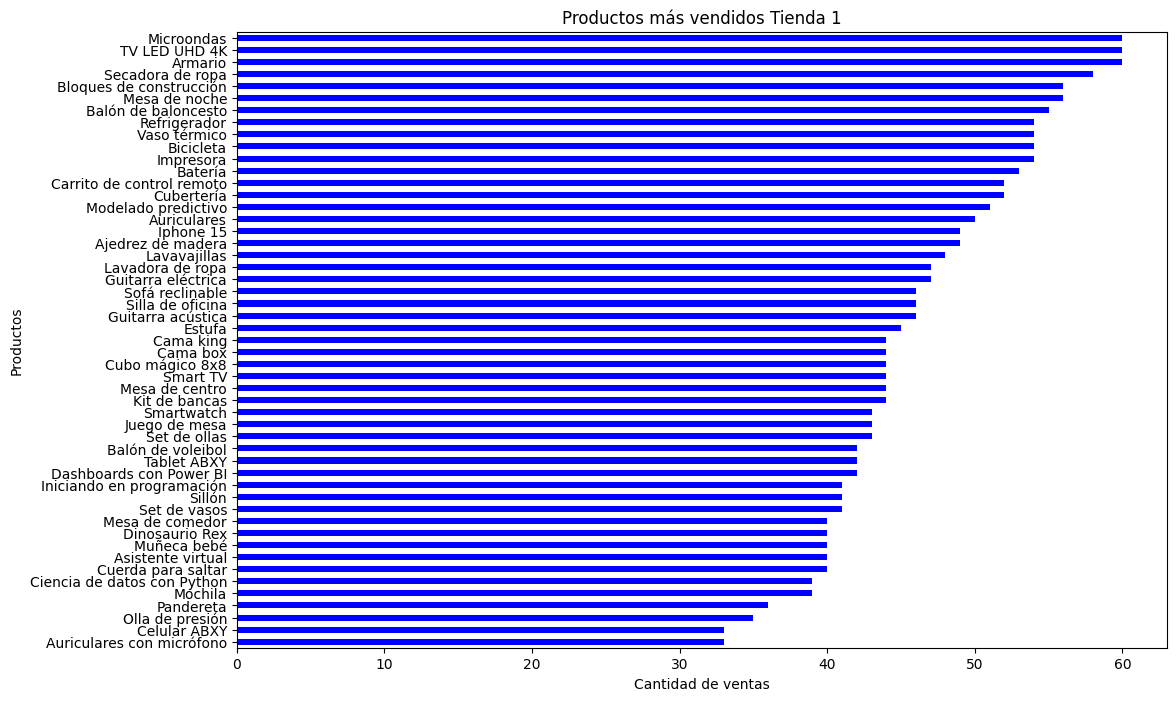

In [22]:
# Se generó una gráfica que muestra visualmente los productos más y menos vendidos en la tienda 1
tienda['Producto'].value_counts().sort_values(ascending=True).plot(kind= 'barh', figsize=(12,8), color = 'blue')
plt.title('Productos más vendidos Tienda 1')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Productos')

In [23]:
# Se obtuvo el nombre del producto y número de productos más y menos vendidos en la tienda 2
producto_mas_vendido = tienda2['Producto'].value_counts().idxmax()
unidades_max2 = tienda2['Producto'].value_counts().max()
producto_menos_vendido = tienda2['Producto'].value_counts().idxmin()
unidades_min2 = tienda2['Producto'].value_counts().min()
print(f"El producto que más se vende en la tienda 2 es: {producto_mas_vendido} con {unidades_max2} unidades vendidas")
print(f"El producto que menos se vende en la tienda 2 es: {producto_menos_vendido} con {unidades_min2} unidades vendidas")

El producto que más se vende en la tienda 2 es: Iniciando en programación con 65 unidades vendidas
El producto que menos se vende en la tienda 2 es: Juego de mesa con 32 unidades vendidas


Text(0, 0.5, 'Productos')

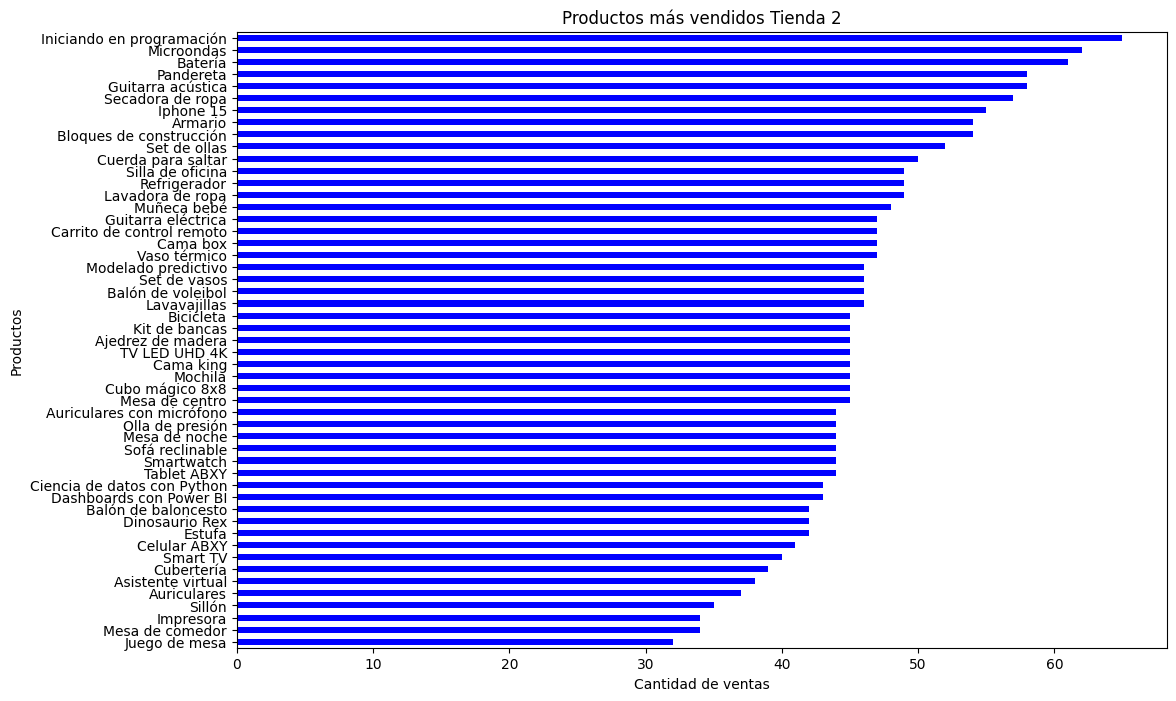

In [24]:
# Se generó una gráfica que muestra visualmente los productos más y menos vendidos en la tienda 2
tienda2['Producto'].value_counts().sort_values(ascending=True).plot(kind= 'barh', figsize=(12,8), color = 'blue')
plt.title('Productos más vendidos Tienda 2')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Productos')

In [25]:
# Se obtuvo el nombre del producto y número de productos más y menos vendidos en la tienda 3
producto_mas_vendido = tienda3['Producto'].value_counts().idxmax()
unidades_max3 = tienda3['Producto'].value_counts().max()
producto_menos_vendido = tienda3['Producto'].value_counts().idxmin()
unidades_min3 = tienda3['Producto'].value_counts().min()
print(f"El producto que más se vende en la tienda 3 es: {producto_mas_vendido} con {unidades_max3} unidades vendidas")
print(f"El producto que menos se vende en la tienda 3 es: {producto_menos_vendido} con {unidades_min3} unidades vendidas")

El producto que más se vende en la tienda 3 es: Kit de bancas con 57 unidades vendidas
El producto que menos se vende en la tienda 3 es: Bloques de construcción con 35 unidades vendidas


Text(0, 0.5, 'Productos')

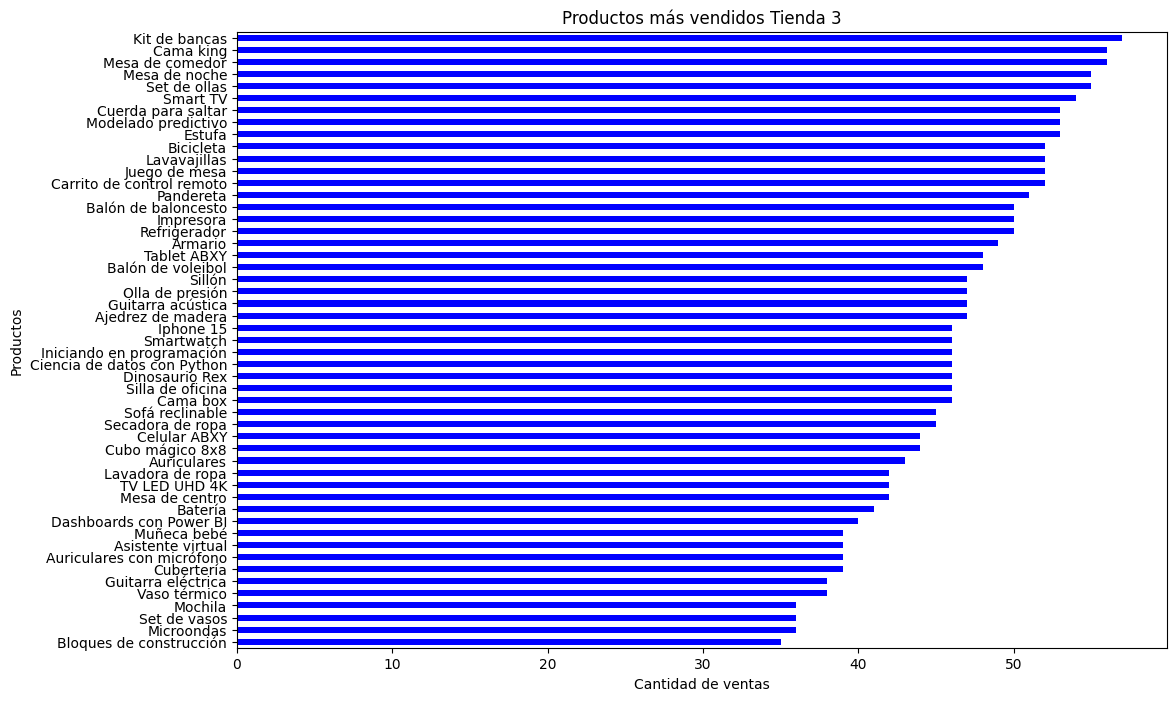

In [26]:
# Se generó una gráfica que muestra visualmente los productos más y menos vendidos en la tienda 3
tienda3['Producto'].value_counts().sort_values(ascending=True).plot(kind= 'barh', figsize=(12,8), color = 'blue')
plt.title('Productos más vendidos Tienda 3')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Productos')

In [27]:
# Se obtuvo el nombre del producto y número de productos más y menos vendidos en la tienda 4
producto_mas_vendido = tienda4['Producto'].value_counts().idxmax()
unidades_max4 = tienda4['Producto'].value_counts().max()
producto_menos_vendido = tienda4['Producto'].value_counts().idxmin()
unidades_min4 = tienda4['Producto'].value_counts().min()
print(f"El producto que más se vende en la tienda 4 es: {producto_mas_vendido} con {unidades_max4} unidades vendidas")
print(f"El producto que menos se vende en la tienda 4 es: {producto_menos_vendido} con {unidades_min4} unidades vendidas")

El producto que más se vende en la tienda 4 es: Cama box con 62 unidades vendidas
El producto que menos se vende en la tienda 4 es: Guitarra eléctrica con 33 unidades vendidas


Text(0, 0.5, 'Productos')

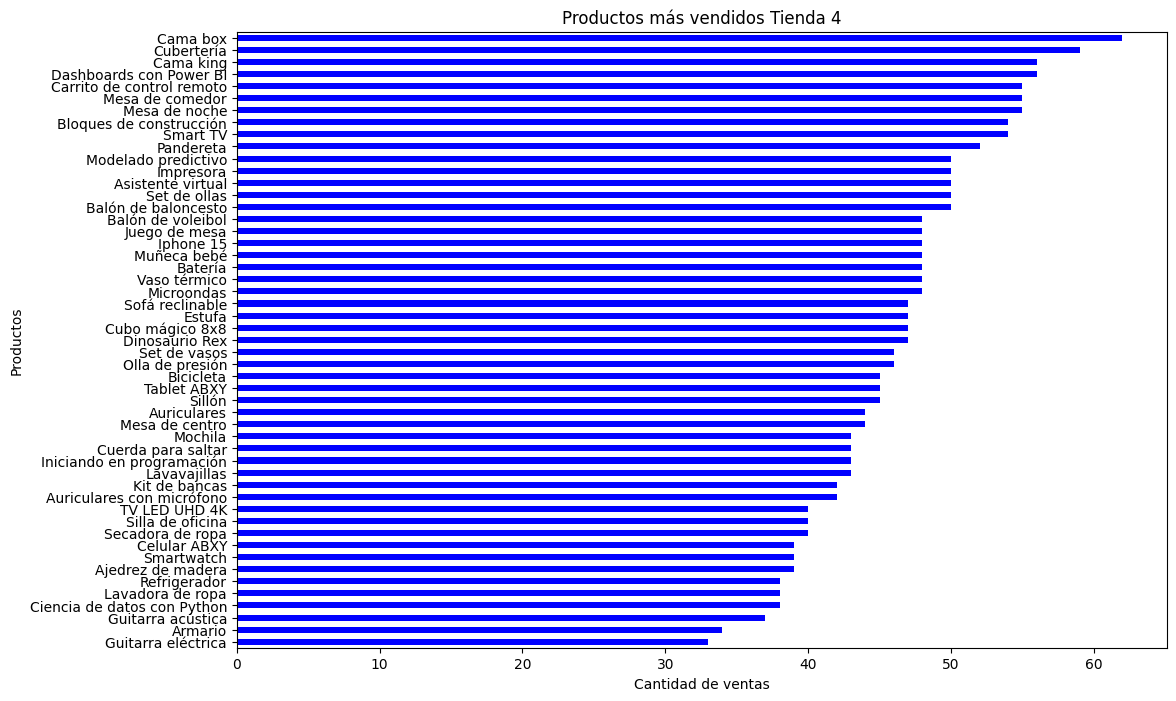

In [28]:
# Se generó una gráfica que muestra visualmente los productos más y menos vendidos en la tienda 4
tienda4['Producto'].value_counts().sort_values(ascending=True).plot(kind= 'barh', figsize=(12,8), color = 'blue')
plt.title('Productos más vendidos Tienda 4')
plt.xlabel('Cantidad de ventas')
plt.ylabel('Productos')

# 5. Envío promedio por tienda

In [40]:
# Se obtuvo el valor del costo de envío promedio para cada tienda
costo_envio_tienda1 = tienda['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

In [41]:
# Se muestra el costo de envío promedio de cada tienda
print(f'El costo de envío promedio de la Tienda 1 es: ${costo_envio_tienda1:,.2f}')
print(f'El costo de envío promedio de la Tienda 2 es: ${costo_envio_tienda2:,.2f}')
print(f'El costo de envío promedio de la Tienda 3 es: ${costo_envio_tienda3:,.2f}')
print(f'El costo de envío promedio de la Tienda 4 es: ${costo_envio_tienda4:,.2f}')

El costo de envío promedio de la Tienda 1 es: $26,018.61
El costo de envío promedio de la Tienda 2 es: $25,216.24
El costo de envío promedio de la Tienda 3 es: $24,805.68
El costo de envío promedio de la Tienda 4 es: $23,459.46


In [33]:
# Se creó el DataFrame df_envio que contiene el valor del costo de envío promedio por tienda
envio_promedio_por_tienda = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                    'Promedio de envío': [tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]}
df_envio = pd.DataFrame(envio_promedio_por_tienda)
df_envio

,Tienda,Promedio de envío
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


# 6. Información consolidada

In [34]:
# Se creó el DataFrame df_consolidado que muestra las ventas totales, la calificación promedio y el costo de envío promedio por tienda para facilitar el análisis final.
consolidado = {'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
               'Ventas':[tienda['Precio'].sum(), tienda2['Precio'].sum(), tienda3['Precio'].sum(), tienda4['Precio'].sum()],
               'Calificación promedio': [tienda['Calificación'].mean(), tienda2['Calificación'].mean(), tienda3['Calificación'].mean(), tienda4['Calificación'].mean()],
               'Promedio de envío': [tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(), tienda3['Costo de envío'].mean(), tienda4['Costo de envío'].mean()]}
df_consolidado = pd.DataFrame(consolidado)
df_consolidado


,Tienda,Ventas,Calificación promedio,Promedio de envío
0,Tienda 1,"1,150,880,400.00",3.98,"26,018.61"
1,Tienda 2,"1,116,343,500.00",4.04,"25,216.24"
2,Tienda 3,"1,098,019,600.00",4.05,"24,805.68"
3,Tienda 4,"1,038,375,700.00",4.00,"23,459.46"


# 7. Extra. Análisis de Desempeño geográfico

In [35]:
import folium
from folium.plugins import HeatMap


In [36]:
# Se unifica la información de todas las tiendas en un DataFrame
unificacion_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [37]:
# Crear mapa centrado en el promedio de coordenadas
centro = [unificacion_tiendas['lat'].mean(), unificacion_tiendas['lon'].mean()]
mapa = folium.Map(location=centro, zoom_start=6)
# Cear Heatmap
HeatMap(data=unificacion_tiendas[['lat', 'lon', 'Precio']], radius=10).add_to(mapa)
# Mostrar mapa
mapa

# 8. Informe final

Al realizar el análisis de diferentes aspectos de las 4 tiendas tales como: Ventas totales, Calificación promedio, Costo por envío y Ventas por producto, se llegó a las siguientes conclusiones



*   La Tienda 1 se destaca por tener los ingresos más altos, sin embargo, cuenta con la calificación más baja y el costo de envío más elevado.
*   La Tienda 2 y 3 muestran la menor diferencia entre sus ingresos y las calificaciones obtenidas, de igual forma, estas tiendas cuentan con las mejores evaluaciones de los clientes. Debido a los ingresos de estas tiendas y sus evaluaciones, estas aportan estabilidad y confiabilidad a la empresa.
*   La Tienda 4 muestra el desempeño más bajo en cuanto a ingresos por una diferencia considerable respecto a las demás tiendas aunque la calificación de clientes es mayor que la de la Tienda 1. También tiene el costo de envío más bajo.





#### Conclusión

Aunque la Tienda 4 tiene una mejor evaluación de los clientes respecto a la Tienda 1, la diferencia es no es tan grande (solo .02 puntos), sin embargo, la diferencia entre los ingresos generados por la Tienda 4 son significativamente menores a los de las demás tiendas (al menos $56,643,900.00 de diferencia). Aunque cuenta con los costos de envío más bajos, esto no ha tenido un impacto significativo en su desempeño en ventas o evaluaciones de los clientes por lo que no se observa ningún aspecto en el que la Tienda 4 destaque de manera positiva por lo tanto **se recomienda vender la Tienda 4.**